In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import eig
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [2]:
df = pd.read_csv("data/tabla_nutricional.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alimento              53 non-null     object 
 1   Cantidad (gr/ml)      53 non-null     float64
 2   HC (gr)               39 non-null     float64
 3   Proteinas (gr)        44 non-null     float64
 4   Grasas (gr)           31 non-null     float64
 5   Na (mg)               51 non-null     float64
 6   Ca (mg)               49 non-null     float64
 7   Fe (mg)               42 non-null     float64
 8   Azucares Libres (gr)  7 non-null      float64
 9   AGS (gr)              29 non-null     float64
 10  AGNI (gr)             26 non-null     float64
 11  AG p (gr)             27 non-null     float64
 12  Fibra (gr)            23 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.5+ KB


 a) Leer los datos de la tabla. Completar las celdas faltantes con ceros. Poner todos los
 datos en la misma unidad.

In [3]:
#Reemplazo de ceros

df = df.fillna(0)

In [4]:
#Pasaje de miligramos a gramos
for i in ['Na (mg)', 'Ca (mg)', 'Fe (mg)']:
    df[i] = df[i] / 1000

In [5]:
df.rename(columns = {
    'Na (mg)': 'Na (gr)', 
    'Ca (mg)': 'Ca (gr)', 
    'Fe (mg)': 'Fe (gr)'
}, inplace = True)

In [6]:
df.head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.00,12.42,8.37,7.83,0.15390,0.28350,0.18900,0.0,4.99,2.19,0.52,0.0
1,Leche entera en polvo,11.00,4.51,2.84,2.73,0.04444,0.09900,0.00006,0.0,1.62,0.77,0.06,0.0
2,Yogurt,19.00,2.45,0.51,0.49,0.00799,0.01767,0.00500,0.0,0.32,0.14,14.00,0.0
3,Queso crema,1.66,0.06,0.10,0.37,0.00123,0.00093,0.00000,0.0,0.36,0.11,0.01,0.0
4,Queso cuartirolo,3.66,0.06,0.77,0.80,0.02084,0.01654,0.00000,0.0,0.76,0.21,0.02,0.0


In [7]:
#Corroboramos que la varianza de cada variable sea distinta de cero
X = df.drop('Alimento', axis=1)
X.var()

Cantidad (gr/ml)         3057.137698
HC (gr)                  9595.985898
Proteinas (gr)            167.950042
Grasas (gr)                26.279402
Na (gr)                     0.990677
Ca (gr)                     0.001699
Fe (gr)                     0.000671
Azucares Libres (gr)       35.087880
AGS (gr)                19244.339549
AGNI (gr)                 260.941808
AG p (gr)                3164.273777
Fibra (gr)                  1.045760
dtype: float64

 b) Realizar un Analisis en Componentes Principales (ACP), tomando el valor nutricional
 de cada alimento por gramo. ¿Cuantas componentes principales eligirıa para reducir
 la dimension del conjunto de datos original?

In [8]:
ss = StandardScaler()
X = df.drop('Alimento', axis=1)
y = df['Alimento']

X_scaled = ss.fit_transform(X)
dfStandard = pd.DataFrame(X_scaled, columns = X.columns)
dfStandard.head()

,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,4.308463,-0.094551,0.247462,1.178281,-0.042065,6.610697,7.200873,-0.182494,-0.122562,-0.116989,-0.256264,-0.396011
1,-0.420637,-0.176072,-0.183333,0.173900,-0.153091,2.092320,-0.160371,-0.182494,-0.147087,-0.205736,-0.264520,-0.396011
2,-0.274565,-0.197302,-0.364844,-0.267241,-0.190063,0.100561,0.032095,-0.182494,-0.156548,-0.245109,-0.014334,-0.396011
3,-0.591177,-0.221934,-0.396784,-0.290873,-0.196919,-0.309399,-0.162709,-0.182494,-0.156257,-0.246984,-0.265417,-0.396011
4,-0.554659,-0.221934,-0.344590,-0.206190,-0.177029,0.072887,-0.162709,-0.182494,-0.153346,-0.240734,-0.265237,-0.396011


Analizamos la acumulación de varianza lograda según la cantidad de variables contempladas

In [12]:
# FALTA TERMINAR, REEMPLAZARÍA LA CELDA DE ABAJO
n, m = X_scaled.shape
pca = PCA(n_components=m)
pca.fit(X_scaled)
varianza_exp = pca.explained_variance_ratio_

In [10]:
lista_varianza = []
lista_varianza_acumulada = []

for i in range(1,X_scaled.shape[1] + 1):
    pca_var= PCA(n_components=i)
    pca_var.fit(X_scaled)
    lista_varianza.append(pca_var.explained_variance_ratio_.tolist()[i-1])
    lista_varianza_acumulada.append(pca_var.explained_variance_ratio_.cumsum().tolist()[-1])


print(lista_varianza)
print("----")
print(lista_varianza_acumulada)

[0.2245567427729313, 0.1540449256485064, 0.12959131193168968, 0.11193446907323618, 0.08730513105310762, 0.08199675326942243, 0.07936079628529202, 0.06960185737214326, 0.034586524387023865, 0.01720582778774584, 0.006217230964052558, 0.0035984294548487158]
----
[0.2245567427729313, 0.3786016684214377, 0.5081929803531274, 0.6201274494263636, 0.7074325804794712, 0.7894293337488937, 0.8687901300341857, 0.938391987406329, 0.9729785117933529, 0.9901843395810987, 0.9964015705451513, 1.0]


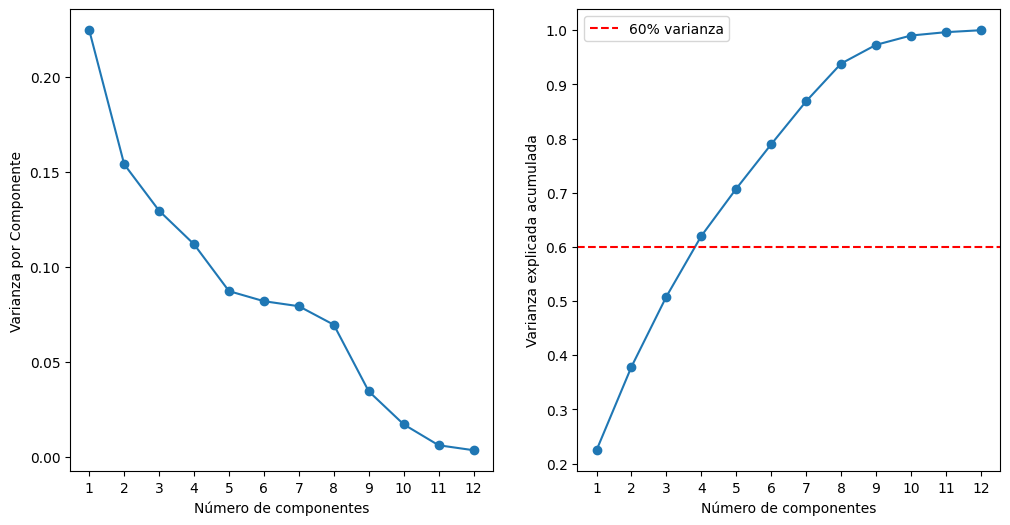

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(range(1, len(lista_varianza)+1),
         lista_varianza, marker='o')
ax1.set_xticks(range(1, len(lista_varianza) + 1))
ax1.set_xlabel('Número de componentes')
ax1.set_ylabel('Varianza por Componente')

ax2.plot(range(1, len(lista_varianza)+1),
         lista_varianza_acumulada, marker='o')
ax2.set_xticks(range(1, len(lista_varianza) + 1))
ax2.axhline(y=0.60, color='r', linestyle='--', label='60% varianza')
#ax2.axhline(y=0.80, color='g', linestyle='--', label='80% varianza')
ax2.set_xlabel('Número de componentes')
ax2.set_ylabel('Varianza explicada acumulada')
plt.legend()
plt.show()

### Analizando los gráficos, notamos que la mayor caída en la cantidad de varianza explicada, luego de superar el umbral del 60%, se produce entre la cantidad de componentes 8 y 9.

c) Graficar cada alimento como un punto en ejes coordenados de un nuevo espacio creado por los autovectores generadores del ACP.

In [18]:
#Aplicación de PCA con 8 componentes
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

In [19]:
alimentos = y.unique().tolist()
alimentos.sort()

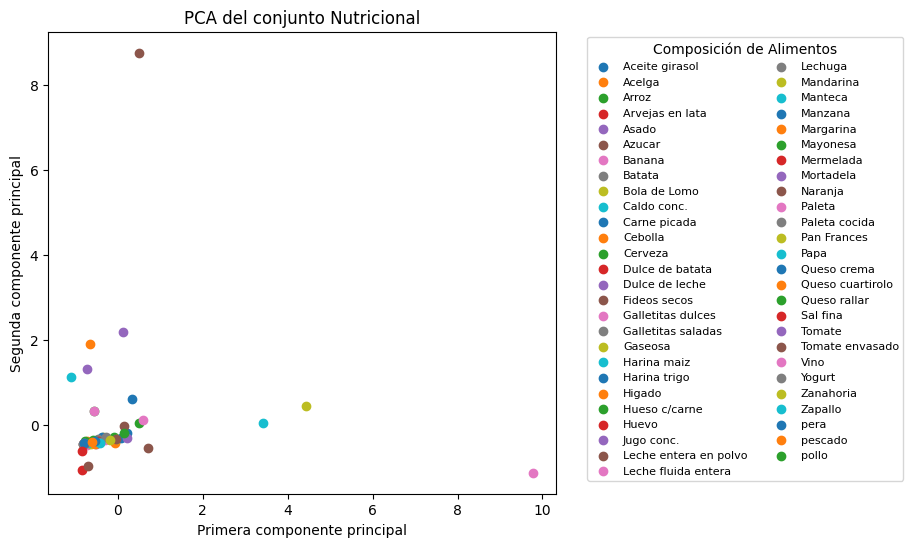

In [20]:
plt.figure(figsize=(30,6))
plt.axes().set_aspect('equal')

for i in range(len(alimentos)):
    plt.scatter(X_pca[y == alimentos[i], 0], X_pca[y == alimentos[i], 1], label=alimentos[i])
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.legend(title='Composición de Alimentos', 
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    ncol=2,
    fontsize=8)
plt.title('PCA del conjunto Nutricional')
plt.show()

In [21]:
df_plot = pd.DataFrame(X_pca[:, :3], columns=['CP1', 'CP2', 'CP3'])
df_plot['Alimento'] = y  

fig = px.scatter_3d(df_plot, x='CP1', y='CP2', z='CP3', color='Alimento')
fig.update_layout(title='Visualización 3D del PCA nutricional')
fig.show()

C:\Users\Estudio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


d ) En el gráfico realizado en el  ́ıtem anterior, analizar si se visualizan agrupamientos de
los alimentos.

no existen agrupamientos marcados, pero el análisis de un gráfico de componentes principales que explican menos del 60% de la varianza no es fiable.